## Coletando a base de dados
MNIST - Dígitos manuscritos 

Vamos usar as bases de dados do Keras

In [3]:
from tensorflow import keras
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mnist_dataset = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0]

5

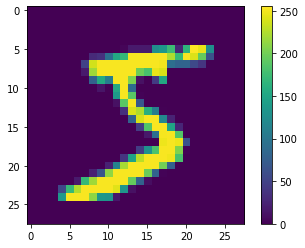

In [11]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pré processamento. Vamos ajustar os valores para variar no intervalo (0,1).

In [15]:
print(x_train.max())
print(x_train.min())

255
0


In [16]:
x_train = x_train/255
x_test = x_test/255

In [18]:
print(x_train.max())
print(x_train.min())

1.0
0.0


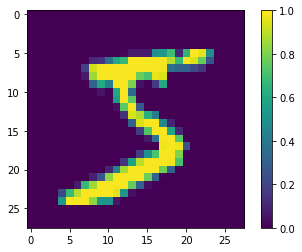

In [17]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Vamos treinar uma rede totalmente conectada e avaliar o desempenho.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6409 - accuracy: 0.8330
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9283
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2102 - accuracy: 0.9401
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1619 - accuracy: 0.9539
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1453 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1314 - accuracy: 0.9624
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9659
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.110

In [33]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nAccuracy na base de teste:', test_acc)


313/313 - 0s - loss: 0.1210 - accuracy: 0.9623

Accuracy na base de teste: 0.9623000025749207


In [34]:
pred = model.predict(x_test)

In [35]:
pred

array([[2.2698066e-05, 4.7368275e-07, 6.1388762e-04, ..., 9.9427611e-01,
        6.6673834e-05, 1.6067483e-04],
       [4.7506447e-04, 4.8842821e-03, 9.7890204e-01, ..., 6.1375559e-08,
        2.2107081e-03, 3.1697493e-08],
       [7.9251302e-05, 9.8498625e-01, 3.8554152e-03, ..., 7.0404937e-03,
        1.9154323e-03, 1.5667669e-04],
       ...,
       [9.0959922e-08, 6.0959113e-09, 9.0106035e-08, ..., 4.6541045e-05,
        1.5800860e-04, 6.3668605e-04],
       [2.1925618e-05, 3.3707404e-06, 2.3153297e-07, ..., 8.9426990e-08,
        6.8156286e-03, 6.3458276e-07],
       [4.3062209e-06, 8.3229725e-09, 1.3084569e-05, ..., 1.2585070e-09,
        2.3565580e-08, 1.6574566e-09]], dtype=float32)

In [36]:
import numpy as np

In [37]:
np.argmax(pred[0])

7

Agora vamos implementar uma rede neural convolucional.

In [112]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))

In [113]:
cnn.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

In [114]:
cnn.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [115]:
x_train.shape

(60000, 28, 28, 1)

In [116]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)

In [117]:
x_train.shape

(60000, 28, 28, 1)

In [118]:
x_test.shape

(10000, 28, 28, 1)

In [119]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5578 - accuracy: 0.8345
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1511 - accuracy: 0.9546
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1027 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0814 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0696 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0599 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0536 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0485 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [127]:
test_loss, test_acc = cnn.evaluate(x_test,  y_test, verbose=2)
print('\nAccuracy na base de teste:', test_acc)

313/313 - 2s - loss: 0.0427 - accuracy: 0.9854

Accuracy na base de teste: 0.9854000210762024


Experimento de Transfer Learning

In [132]:
fashion_mnist = keras.datasets.fashion_mnist
(f_x_train, f_y_train), (f_x_test, f_y_test) = fashion_mnist.load_data()

In [133]:
f_x_train.shape

(60000, 28, 28)

9


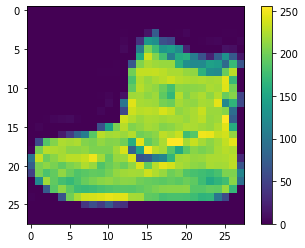

In [134]:
plt.figure()
plt.imshow(f_x_train[0])
print(f_y_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [137]:
f_x_train = f_x_train.reshape(x_train.shape[0], 28, 28, 1)
f_x_test= f_x_test.reshape(x_test.shape[0], 28, 28, 1)

In [138]:
f_x_train.shape

(60000, 28, 28, 1)

In [139]:
f_y_train.shape

(60000,)

In [140]:
test_loss, test_acc = cnn.evaluate(f_x_test,  f_y_test, verbose=2)
print('\nAccuracy na base de teste:', test_acc)

313/313 - 2s - loss: 1343.0013 - accuracy: 0.0367

Accuracy na base de teste: 0.03669999912381172


Acessando as camadas do modelo treinado.

In [141]:
cnn.layers

In [142]:
cnn.layers[:4]

In [143]:
base_cnn = keras.Sequential(cnn.layers[:4])

In [144]:
base_cnn.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [145]:
base_cnn.trainable = False

In [146]:
base_cnn.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
Total params: 9,568
Trainable params: 0
Non-trainable params: 9,568
_________________________________________________________________


In [152]:
base_cnn.predict(f_x_test[0:1]).shape

(1, 5, 5, 32)

In [155]:
cnn2 = keras.Sequential(cnn.layers[:4])

In [157]:
cnn2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
Total params: 9,568
Trainable params: 0
Non-trainable params: 9,568
_________________________________________________________________


In [158]:
cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(100, activation='relu'))
cnn2.add(keras.layers.Dense(10, activation='softmax'))

In [159]:
cnn2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

In [163]:
cnn2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [164]:
test_loss, test_acc = cnn2.evaluate(f_x_test,  f_y_test, verbose=2)
print('\nAccuracy na base de teste:', test_acc)

313/313 - 2s - loss: 865.5079 - accuracy: 0.0849

Accuracy na base de teste: 0.08489999920129776


In [165]:
cnn2.fit(f_x_train, f_y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 70.2119 - accuracy: 0.1407
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.1704 - accuracy: 0.1629
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.1186 - accuracy: 0.1815
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.1273 - accuracy: 0.1767
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.1115 - accuracy: 0.1787
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.1112 - accuracy: 0.1828
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0948 - accuracy: 0.1818
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0829 - accuracy: 0.1868
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0776 - accuracy: 0.1858
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step -

In [166]:
test_loss, test_acc = cnn2.evaluate(f_x_test,  f_y_test, verbose=2)
print('\nAccuracy na base de teste:', test_acc)

313/313 - 2s - loss: 2.0580 - accuracy: 0.1912

Accuracy na base de teste: 0.19120000302791595


In [167]:
cnn2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

In [168]:
cnn2.trainable = True

In [169]:
cnn2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               80100     
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

In [170]:
cnn2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [171]:
cnn2.fit(f_x_train, f_y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 2.0463 - accuracy: 0.1935
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 2.0350 - accuracy: 0.1977
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 1.9656 - accuracy: 0.2284
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 1.9022 - accuracy: 0.2523
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 1.8903 - accuracy: 0.2534


In [172]:
test_loss, test_acc = cnn2.evaluate(f_x_test,  f_y_test, verbose=2)
print('\nAccuracy na base de teste:', test_acc)

313/313 - 2s - loss: 1.9122 - accuracy: 0.2600

Accuracy na base de teste: 0.25999999046325684
